In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cycler
from scipy import stats
import statsmodels.api as sm

In [28]:
df = pd.read_csv('ps4_data.csv')
df.rename(columns = {'rwm': 'rmw', 'cwa': 'cma'}, inplace = True) #to correct typos
df.head()

,date,dc,rmrf,smb,hml,rmw,cma,rf
0,1965,1.041604,0.127407,0.058738,0.049770,-0.017249,0.031820,1.035464
1,1966,1.056917,0.055934,0.275981,0.099230,-0.047296,-0.041547,1.040741
2,1967,1.024699,-0.048238,0.051729,-0.047978,0.052866,-0.034082,1.048130
3,1968,1.030531,0.048977,0.294648,0.012434,-0.013847,0.008362,1.041986
4,1969,1.037062,0.095980,0.176491,0.121798,-0.049007,0.051984,1.054306


In [5]:
df.mean()

date    1992.000000
dc         1.022816
rmrf       0.067815
smb        0.033605
hml        0.046597
rwm        0.036438
cwa        0.036967
rf         1.047367
dtype: float64

In [6]:
df.std()

date    16.020820
dc       0.013710
rmrf     0.175256
smb      0.128658
hml      0.161330
rwm      0.127714
cwa      0.090630
rf       0.032563
dtype: float64

In [7]:
df.mean() / df.std()

date    124.338207
dc       74.605745
rmrf      0.386949
smb       0.261198
hml       0.288833
rwm       0.285311
cwa       0.407883
rf       32.164600
dtype: float64

In [10]:
df.corr()

,date,dc,rmrf,smb,hml,rwm,cwa,rf
date,1.000000,-0.347947,0.175354,-0.169582,-0.136458,0.105322,-0.113986,-0.623087
dc,-0.347947,1.000000,0.195596,0.100344,0.105126,-0.120938,-0.105504,0.022289
rmrf,0.175354,0.195596,1.000000,0.228969,-0.144255,-0.377321,-0.282555,-0.171138
smb,-0.169582,0.100344,0.228969,1.000000,-0.096191,-0.418131,-0.019824,-0.022965
hml,-0.136458,0.105126,-0.144255,-0.096191,1.000000,0.364803,0.736191,0.151177
rwm,0.105322,-0.120938,-0.377321,-0.418131,0.364803,1.000000,0.224993,0.039323
cwa,-0.113986,-0.105504,-0.282555,-0.019824,0.736191,0.224993,1.000000,0.172575
rf,-0.623087,0.022289,-0.171138,-0.022965,0.151177,0.039323,0.172575,1.000000


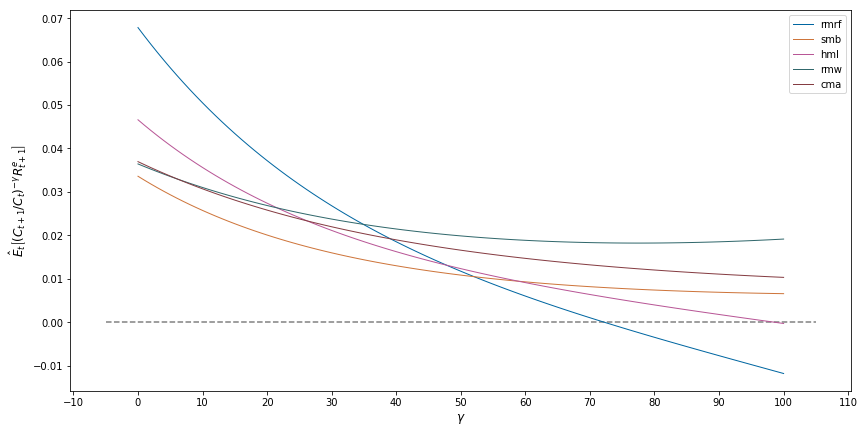

In [34]:
# ax will be an array of Axes objects
fig, ax = plt.subplots(figsize=(14, 7))
ax.set_prop_cycle(cycler('color', ['#0066a1', '#ce753b', '#b85696', '#31686c', '#853c42']))

# Call plot() method on the appropriate object
ax.plot(list(range(0, 101)), [((df['dc'] ** (- gamma)) * df['rmrf']).mean() for gamma in range(0, 101)], linewidth=1, label = 'rmrf')
ax.plot(list(range(0, 101)), [((df['dc'] ** (- gamma)) * df['smb']).mean() for gamma in range(0, 101)], linewidth=1, label = 'smb')
ax.plot(list(range(0, 101)), [((df['dc'] ** (- gamma)) * df['hml']).mean() for gamma in range(0, 101)], linewidth=1, label = 'hml')
ax.plot(list(range(0, 101)), [((df['dc'] ** (- gamma)) * df['rmw']).mean() for gamma in range(0, 101)], linewidth=1, label = 'rmw')
ax.plot(list(range(0, 101)), [((df['dc'] ** (- gamma)) * df['cma']).mean() for gamma in range(0, 101)], linewidth=1, label = 'cma')
ax.hlines(0, xmin = ax.get_xlim()[0], xmax = ax.get_xlim()[1], colors = 'grey', linestyles='dashed')

ax.set_xlabel(r'$\gamma$', fontsize = 12)
ax.set_ylabel(r'$\hat{E}_t\left[(C_{t+1}/C_t)^{-\gamma} R_{t+1}^e\right]$', fontsize = 12)
ax.xaxis.set_major_locator(plt.MultipleLocator(10))
ax.yaxis.set_major_locator(plt.MultipleLocator(0.01))
ax.legend();

In [35]:
fig.savefig('q2fig1.pdf', format = 'pdf')

In [47]:
((df['dc'] ** (- 98)) * df['hml']).mean()

0.00013449834763981598

In [48]:
df

,date,dc,rmrf,smb,hml,rmw,cma,rf
0,1965,1.041604,0.127407,0.058738,0.049770,-0.017249,0.031820,1.035464
1,1966,1.056917,0.055934,0.275981,0.099230,-0.047296,-0.041547,1.040741
2,1967,1.024699,-0.048238,0.051729,-0.047978,0.052866,-0.034082,1.048130
3,1968,1.030531,0.048977,0.294648,0.012434,-0.013847,0.008362,1.041986
4,1969,1.037062,0.095980,0.176491,0.121798,-0.049007,0.051984,1.054306
5,1970,1.028929,-0.140964,-0.105571,-0.072385,0.087555,-0.004515,1.068138
6,1971,1.013517,0.034716,-0.031792,0.158064,0.002388,0.175839,1.059774
7,1972,1.029275,0.108212,0.036022,-0.102654,0.105035,-0.046233,1.042089
8,1973,1.055541,-0.017673,-0.224744,0.076205,0.066514,-0.011058,1.041570
9,1974,1.002967,-0.198318,-0.080715,0.313951,-0.169841,0.167717,1.073140


# GMM

In [78]:
from scipy.optimize import minimize_scalar

In [93]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['rmrf'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['rmrf'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.identity(1) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df['rmrf'])[:, np.newaxis], axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat)

72.25139527630924 [[48.78637925]] [[2.29343235e-10]] [[-0.00046062]]


In [94]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['rmrf'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['rmrf'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.linalg.inv(s_hat) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df['rmrf'])[:, np.newaxis], axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat)

72.25139527630922 [[48.78637925]] [[2.29343243e-10]] [[-0.0165843]]


In [117]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.identity(1) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df['smb'])[:, np.newaxis], axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)
# var_gT_hat = ((np.identity(1) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat) @ s_hat @ (np.identity(1) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat).transpose()) /  / df.shape[0]
# std_gT_hat = np.sqrt(var_gT_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat)

116.58941167921739 [[1.07914203e+11]] [[0.00640769]] [[-4.32062772e-14]]


In [118]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.linalg.inv(s_hat) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df['smb'])[:, np.newaxis], axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)
# var_gT_hat = ((np.identity(1) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat) @ s_hat @ (np.identity(1) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat).transpose()) /  / df.shape[0]
# std_gT_hat = np.sqrt(var_gT_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat)

116.58941167996443 [[1.10196062e+11]] [[0.00640769]] [[-3.53871659e-11]]


In [119]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.identity(1) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df['hml'])[:, np.newaxis], axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)
# var_gT_hat = ((np.identity(1) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat) @ s_hat @ (np.identity(1) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat).transpose()) /  / df.shape[0]
# std_gT_hat = np.sqrt(var_gT_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat)

98.6568615507925 [[63.53274537]] [[3.21207393e-11]] [[-0.00020457]]


In [120]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.linalg.inv(s_hat) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df['hml'])[:, np.newaxis], axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)
# var_gT_hat = ((np.identity(1) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat) @ s_hat @ (np.identity(1) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat).transpose()) /  / df.shape[0]
# std_gT_hat = np.sqrt(var_gT_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat)

98.65686155079254 [[63.53274537]] [[3.21207289e-11]] [[-0.02201902]]


In [111]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.identity(2) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df[['rmrf', 'smb']]), axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)
var_gT_hat = ((np.identity(2) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat) @ s_hat @ (np.identity(2) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat).transpose()) / df.shape[0]
std_gT_hat = np.sqrt(var_gT_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat, std_gT_hat)

75.16332208480158 [[49.67817389]] [[-0.00132406]
 [ 0.00775938]] [[-4.49073652e-04 -7.66301287e-05]] [[0.00102228        nan]
 [       nan 0.00599086]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


In [112]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.linalg.inv(s_hat) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df[['rmrf', 'smb']]), axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)
var_gT_hat = ((np.identity(2) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat) @ s_hat @ (np.identity(2) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat).transpose()) / df.shape[0]
std_gT_hat = np.sqrt(var_gT_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat, std_gT_hat)

96.99882945839491 [[62.5354165]] [[-0.01055634]
 [ 0.00666471]] [[-0.01412309 -0.0223698 ]] [[0.00703452        nan]
 [       nan 0.00444122]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


In [113]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df[['rmrf', 'hml']])
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df[['rmrf', 'hml']])
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.identity(2) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df[['rmrf', 'hml']]), axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)
var_gT_hat = ((np.identity(2) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat) @ s_hat @ (np.identity(2) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat).transpose()) / df.shape[0]
std_gT_hat = np.sqrt(var_gT_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat, std_gT_hat)

77.60275371839766 [[42.85424649]] [[-0.00240908]
 [ 0.00454641]] [[-0.00044068 -0.00023351]] [[0.00708306        nan]
 [       nan 0.01336712]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt


In [114]:
def gT(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df[['rmrf', 'hml']])
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

def gTprime(gamma):
    M = np.array(df['dc'] ** (-gamma))[:, np.newaxis]
    Re = np.array(df[['rmrf', 'hml']])
    # Re = np.array(df['smb'])[:, np.newaxis]
    # Re = np.array(df['hml'])[:, np.newaxis]
    # Re = np.array(df[['rmrf', 'smb']])
    # Re = np.array(df[['rmrf', 'hml']])
    return np.mean(- np.log(np.array(df['dc'])[:, np.newaxis]) * M * Re, axis=0)[:, np.newaxis] # Nx1-dimention array

W = np.linalg.inv(s_hat) # NxN-dimention array

def obj(gamma):
    return (gT(gamma).transpose() @ W @ gT(gamma))[0, 0] # 1x1 array
    
gamma_hat = minimize_scalar(obj).x

d_hat = gTprime(gamma_hat) # Nx1-dimention array
a_hat = d_hat.transpose() @ W # 1xN array
s_hat = np.diag(np.var(np.array(df['dc'] ** (-gamma_hat))[:, np.newaxis] * np.array(df[['rmrf', 'hml']]), axis = 0))
gT_hat = gT(gamma_hat)
var_gamma_hat = (np.linalg.inv(a_hat @ d_hat) @ a_hat @ s_hat @ a_hat.transpose() @ np.linalg.inv(a_hat @ d_hat).transpose()) / df.shape[0]
std_gamma_hat = np.sqrt(var_gamma_hat)
var_gT_hat = ((np.identity(2) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat) @ s_hat @ (np.identity(2) - d_hat @ np.linalg.inv(a_hat @ d_hat) @ a_hat).transpose()) / df.shape[0]
std_gT_hat = np.sqrt(var_gT_hat)

print(gamma_hat, std_gamma_hat, gT_hat, a_hat, std_gT_hat)

85.26666414362103 [[40.45477967]] [[-0.0057055 ]
 [ 0.00281771]] [[-0.01403265 -0.02841435]] [[0.01748136        nan]
 [       nan 0.00863331]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in sqrt
